# Informational Entropy

SPS Blog: [The Things That Need Not Be Said: The Redundancy of Languages](https://sps.nus.edu.sg/blog/2021/07/19/the-things-that/)

Link to Stanford Write-Up: [Claude Shannon & Information Theory](https://cs.stanford.edu/people/eroberts/courses/soco/projects/1999-00/information-theory/entropy_of_english_9.html#:~:text=Shannon%20uses%20an%20approximating%20function,is%202.62%20bits%20per%20letter.&text=Therefore%2C%20using%20the%20formula%201,estimate%20the%20redundancy%20of%20English.)

Original Paper: [The Prediction and Entropy of Printed English](https://www.princeton.edu/~wbialek/rome/refs/shannon_51.pdf)

***

In information theory and linguistics, there is an area of study that allows us to measure the amount of information in a language. Shannon entropy, or information entropy, is a way of determining the amount of information, even without knowledge of the content of the message. This allows us to find interesting correlations with a language's information complexity, distinguish encrpted messages from static noise, as well as determine the information capacity of non-human linguistics.

In this project, we will look at Claude Shannon's analysis of the redundancy in written english.

# Background Information


## Information Entropy

The information entropy is a measure of how much information exists in a system. Another way we can think about it is the amount of surprise we get by seeing its outcome. It is given by the following formula,

$$
H(X) = -\sum^{n}_{i=1} p(x_i) \log_2 p(x_i)
$$

where the entropy $H$ of an event $X$ is given by the sum over the possible outcomes $x_i$ and their associated probabilities $p(x_i)$.

Consider a fair coin flip - it can land either heads or tails with 50% chance. The entropy of the coin is then

\begin{align}
H(X_\mathrm{coin}) 
&= - p(x_\mathrm{heads})\log_2 p(x_\mathrm{heads}) - p(x_\mathrm{tails})\log_2 p(x_\mathrm{tails}) \\
&= - \frac{1}{2} \log_2 \left(\frac{1}{2}\right) \times 2 \\
&= - \log_2 \left(\frac{1}{2}\right)
\end{align}

Similarly, we can find the entropy of a fair dice roll:

$$
H(X_\mathrm{dice}) = - \log_2{\left(\frac{1}{6}\right)}
$$

For a completely biased coin toss (100% heads), we find that the entropy is 0. We can see that a biased coin will unsurprisingly always give heads. On the other hand, a fair coin will give heads or tails evenly, which has the maximum amount of surprise. The graph below illustrates this idea.

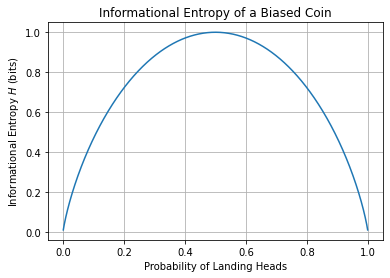

## Shannon's Analysis

Shannon showed that the lower the entropy of a language, the more information it carries. To find the entropy of a langauge, one way we can do this is consider the amount of surprise each character gives us.

In a uniform random distribution of letters, we find that the informational entropy is

$$
H(X_\mathrm{char}) = - \log_2{\left(\frac{1}{26}\right)}
$$

which will give us the highest possible entropy. It is equivalent to utter gibberish in English.

In [57]:
import numpy as np

-np.log2(1/26)

4.700439718141092

However, the actual entropy for English is much lower!

If you picked a random character out of a book, what would it most likely be? It would likely be "e", or perhaps a "t", and unlikely a "q". This tells us that there is some non-random distribution of alphabets in the English language. What if if you knew the preceeding letter was a "q"? Then you would know for certain that the next letter is a "u". 

Shannon's idea is to consider the probability of each character appearing in a text, given the preceeding letters. This allows us to find the entropy of the language as a measure of how well can the next letter be predicted.

***

# Modelling

To model this, we will go over the letters in a text sample, and count the number of occurances of each letter. The counts can then be used to find the probabilities of each letter occuring. In our example, we will consider a 26-character alphabet, without spaces.

## Setting up

### Libraries

To start off, we will import the needed libraries. We will use 

* `numpy` for math
* `matplotlib.pyplot` for plotting

In [58]:
import numpy as np
import matplotlib.pyplot as plt

### Sample Text

Next, we will need our text sample.

In [59]:
text = """Python is an interpreted high-level general-purpose programming language. Its design philosophy emphasizes code readability with its use of significant indentation. Its language constructs as well as its object-oriented approach aim to help programmers write clear, logical code for small and large-scale projects.[30]

Python is dynamically-typed and garbage-collected. It supports multiple programming paradigms, including structured (particularly, procedural), object-oriented and functional programming. It is often described as a "batteries included" language due to its comprehensive standard library.[31][32]

Guido van Rossum began working on Python in the late 1980s, as a successor to the ABC programming language, and first released it in 1991 as Python 0.9.0.[33] Python 2.0 was released in 2000 and introduced new features, such as list comprehensions and a cycle-detecting garbage collection system (in addition to reference counting). Python 3.0 was released in 2008 and was a major revision of the language that is not completely backward-compatible. Python 2 was discontinued with version 2.7.18 in 2020.[34]

Python consistently ranks as one of the most popular programming languages"""

### Cleaning Up

As we can see, the text needs to be cleaned up before we start counting. Punctuation, as well as numbers, need to be removed first. We will also change all letters to lowercase. We will write a function to do this for us. 

It will take in a string as an input, and output a string.

In [60]:
def clean(dirty_text):              # Accepts a string as an argument
    cleaned_text = ""               # Defines a variable to hold our cleaned text

    for char in dirty_text:         # Lets' loop over the characters in the string
        char = char.lower()         # Changes the letter to lowercase
        if char.isalpha():          # Check if its alphabetical
            cleaned_text += char    # and add it to the cleaned text if so
    
    return cleaned_text             # We then return our cleaned text

clean("Test String, with some punctuations, as well as 1 number or 2?")

'teststringwithsomepunctuationsaswellasnumberor'

## First-Order Analysis

We consider the entropy of picking a certain letter, without knowledge of any other characters around it.

We can find the counts of the number of each alphabet in the text. We will use a for-loop to go over each character.

We will need a variable to hold the total number of characters in the string, as well as a dictionary, to hold the number of counts of each letter.

In [61]:
total_count = 0                         # Total counts of the characters
char_counts = {}                        # Dictionary to hold each character

cleaned_text = clean(text)              # First, we clean up the text

for char in cleaned_text:               # Going over each character
    total_count += 1                    # We add to the total count

    if char in char_counts:             # Check if the character is in the dictionary
        char_counts[char] += 1          # If yes, we add +1 to it
    else:                               # Otherwise
        char_counts[char] = 1           # We initialise the character w/ a value of 1

Let's take a look at the distribution of characters!

In [62]:
print(f"Total number of characters: {total_count}")

for char,count in char_counts.items():
    print(f"The letter {char} appeared {count} times!")

Total number of characters: 942
The letter p appeared 37 times!
The letter y appeared 19 times!
The letter t appeared 72 times!
The letter h appeared 25 times!
The letter o appeared 65 times!
The letter n appeared 76 times!
The letter i appeared 72 times!
The letter s appeared 66 times!
The letter a appeared 87 times!
The letter e appeared 93 times!
The letter r appeared 61 times!
The letter d appeared 41 times!
The letter g appeared 40 times!
The letter l appeared 47 times!
The letter v appeared 5 times!
The letter u appeared 28 times!
The letter m appeared 26 times!
The letter z appeared 1 times!
The letter c appeared 41 times!
The letter b appeared 12 times!
The letter w appeared 11 times!
The letter f appeared 10 times!
The letter j appeared 4 times!
The letter k appeared 3 times!


We can see that the letter "e" is the most common, while "q" and "z" are practically non-existent. We can write a function to find our informational entropy: it will take in the total count and the dictionary as input, and return a number (float).

In [68]:
def entropy(total, dict_of_values):                 # Takes in a integer and a dictionary
    H = 0                                           # Initialise a variable to hold the entropy

    for char, count in dict_of_values.items():      # Going through the dictionary
        prob = count/total                          # Convert the counts into probability

        H = H + - prob*np.log2(prob)                # Add it to the entropy
    
    return H                                        # And return it

entropy(10, {"heads": 5, "tails": 5})               # Test the function using a fair coin

0.5
1.0


1.0

In [64]:
entropy(total_count, char_counts)

4.165738466622712

We can see that the entropy is lower ($4.17 < 4.70$), since English has some structure in the distribution of letters

## Second-Order Analysis

We can perform a second-order analysis, where we consider the previous character, and find the probability of the next character. This is known as finding the N-gram, where in this case N is 1. In this case, we must use a different formula for information entropy:

$$
H(X) = p(x_\mathrm{N-gram}) \log_2 p(x_i|x_\mathrm{prev})
$$

where in the case of N-grams, we have the probability $p(x_\mathrm{N-gram})$ of the N-gram (or character pair) appearing, and the conditional probability $p(x_i|x_\mathrm{prev})$ of the letter $x_i$ appearing, given that the sequence $x_\mathrm{prev}$ came before it. 

In the case of considering only the previous character, we just need the probability of the previous character $p(x_\mathrm{prev})$ to find this conditional probability

$$
p(x_i|x_\mathrm{prev}) = \frac{p(x_i)\cap p(x_\mathrm{prev})}{p(x_\mathrm{prev})}
$$

The information entropy becomes

$$
H(X) = p(x_\mathrm{N-gram}) \log_2{\left(\frac{p(x_i)\cap p(x_\mathrm{prev})}{p(x_\mathrm{prev})}\right)}
$$

We do the same procedure as before, but loop over two characters at once to find $p(x_i)\cap(x_\mathrm{prev})$. $p(x_\mathrm{prev})$ was found using our earlier analysis. A modified entropy function will also be used.

In [65]:
total_count2 = 0                        # Total counts of the character pair
char_counts2 = {}                       # Dictionary to hold each character pair

cleaned_text = clean(text)              # First, we clean up the text
length_of_text = len(cleaned_text)

for i in range(length_of_text - 1):     # Going over each character pair
                                        # Note that -1 is to prevent overshoot at the end

    char_pair = cleaned_text[i:i+2]     # For each pair,
    total_count2 += 1                   # We add to the total count

    if char_pair in char_counts2:       # Check if the pair is in the dictionary
        char_counts2[char_pair] += 1    # If yes, we add +1 to it
    else:                               # Otherwise
        char_counts2[char_pair] = 1     # We initialise the pair w/ a value of 1

In [66]:
print(f"Total number of characters: {total_count2}")

for pair,count in char_counts2.items():
    print(f"The letter {pair} appeared {count} times!")

Total number of characters: 941
The letter py appeared 8 times!
The letter yt appeared 9 times!
The letter th appeared 15 times!
The letter ho appeared 8 times!
The letter on appeared 20 times!
The letter ni appeared 7 times!
The letter is appeared 8 times!
The letter sa appeared 8 times!
The letter an appeared 19 times!
The letter in appeared 21 times!
The letter nt appeared 11 times!
The letter te appeared 13 times!
The letter er appeared 7 times!
The letter rp appeared 3 times!
The letter pr appeared 12 times!
The letter re appeared 12 times!
The letter et appeared 5 times!
The letter ed appeared 16 times!
The letter dh appeared 1 times!
The letter hi appeared 3 times!
The letter ig appeared 4 times!
The letter gh appeared 1 times!
The letter hl appeared 1 times!
The letter le appeared 12 times!
The letter ev appeared 2 times!
The letter ve appeared 3 times!
The letter el appeared 9 times!
The letter lg appeared 1 times!
The letter ge appeared 10 times!
The letter en appeared 9 time

In [70]:
def entropy_Ngram(total_Ngram, dict_of_Ngrams, total, dict_of_counts):
    # Our function takes in the new total counts,
    # the counts of the character pairs,
    # and the total and counts we found earlier

    H = 0                                           # Initialise a variable to hold the entropy

    for pair, count in dict_of_Ngrams.items():      # Going through the dictionary of pairs
        # Consider the character pair
        prob = count/total_Ngram                    # Convert the counts into probability

        # Consider the preceeding character
        prev_char = pair[0]                         # Find the previous character
        prev_count = dict_of_counts[prev_char]      # Find the number of counts it had
        prev_prob = prev_count/total                # And so, find its probability

        # Hence, find the conditional probability
        cond_prob = prob / prev_prob                # Finding the conditional probability

        # Entropy
        H = H + - prob*np.log2(cond_prob)           # Add it to the entropy
    
    return H                                        # And return it


In [71]:
entropy_Ngram(total_count2, char_counts2, total_count, char_counts)

3.1930566395509135

And we can see that the entropy is much lower than before.

# Extensions

The information entropy goes down when we consider even more characters preceeding. We can also consider an analysis of word probabilities, as words also hold meaning and structure in a language.

1. Use a larger text sample. Does it give the same result?
2. How do names affect the results, instead of common vernecular words?
3. Consider more previous characters in the analysis. How much lower can the informational entropy go?
4. Consider an analysis of words. How low is the entropy?
5. Using another language, find the informational entropy
6. Compare a text sample translated in two languages. Is the informational entropy the same?
7. Compare a text message encrypted using various protocols. Which protocols can mask their information signature? Can we circumvent it?